In [34]:
import os
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from wordcloud import WordCloud


In [22]:
cwd = os.getcwd()
if os.path.basename(cwd) == "Notebooks":
    project_root = os.path.dirname(cwd)
else:
    project_root = cwd
path = os.path.join(project_root, "data", "Airbnb_DK_Processed_Data.csv")
df = pd.read_csv(path)

In [23]:
X = df[['longitude', 'latitude']].values

k = 12  
kmeans = KMeans(n_clusters=k, random_state=42)

df['k-cluster'] = kmeans.fit_predict(X)

In [24]:
cluster_text = df.groupby('k-cluster')['comments'].apply(lambda x: ' '.join(x)).reset_index()

print(cluster_text)

    k-cluster                                           comments
0           0  Beautiful apartment in great location. Walking...
1           1  Awesome apartment with an awesome location. Th...
2           2  Arne's apartment is beautiful, very stylish, a...
3           3  Sanne was an excellent hostess. When we needed...
4           4  Fantastic, friendly people. Cozy flat in a won...
5           5  The flat was really great, very comfortable an...
6           6  Svend's house is a very nice place to stay to ...
7           7  Trengte overnatting i to netter før flyavgang....
8           8  Highly recommended! The apartment was in great...
9           9  We had a wonderful stay at the Darrell family'...
10         10  Trine's place is great! And she is a wonderful...
11         11  We had a great stay. The apartment on the seco...


In [33]:
custom_stopwords = [
    "br"
]

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

vectorizer = TfidfVectorizer(
    stop_words=custom_stopwords + list(vectorizer.get_stop_words()),
    max_features=5000
)

tfidf_matrix = vectorizer.fit_transform(cluster_text['comments'])

tfidf_df_comm = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=cluster_text['k-cluster'],
    columns=vectorizer.get_feature_names_out()
)
comm_names = tfidf_df_comm.index

top_words_comm = {}

# Create TF-IDF DataFrame
tfidf_df_comm = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=cluster_text['k-cluster'],
    columns=vectorizer.get_feature_names_out()
)

# Get cluster names from the DataFrame index
comm_names = tfidf_df_comm.index

# Print top words for each cluster
top_words_comm = {}

for comm in comm_names:
    sorted_words = tfidf_df_comm.loc[comm].sort_values(ascending=False)
    top_words_comm[comm] = sorted_words.head(10)

    print(f"\n--- Cluster {comm} ---")
    for word, score in top_words_comm[comm].items():
        print(f"{word:<20} {score:.4f}")



--- Cluster 0 ---
apartment            0.3675
great                0.2944
stay                 0.2804
place                0.2271
metro                0.1766
location             0.1755
copenhagen           0.1705
nice                 0.1637
host                 0.1529
und                  0.1416

--- Cluster 1 ---
apartment            0.3893
great                0.3452
location             0.3378
stay                 0.2836
place                0.2260
copenhagen           0.2003
clean                0.1386
host                 0.1365
perfect              0.1324
recommend            0.1245

--- Cluster 2 ---
stay                 0.2657
great                0.2450
place                0.2363
apartment            0.2131
und                  0.1981
metro                0.1936
nice                 0.1735
city                 0.1548
clean                0.1525
die                  0.1505

--- Cluster 3 ---
stay                 0.2540
apartment            0.2342
place                0.2331


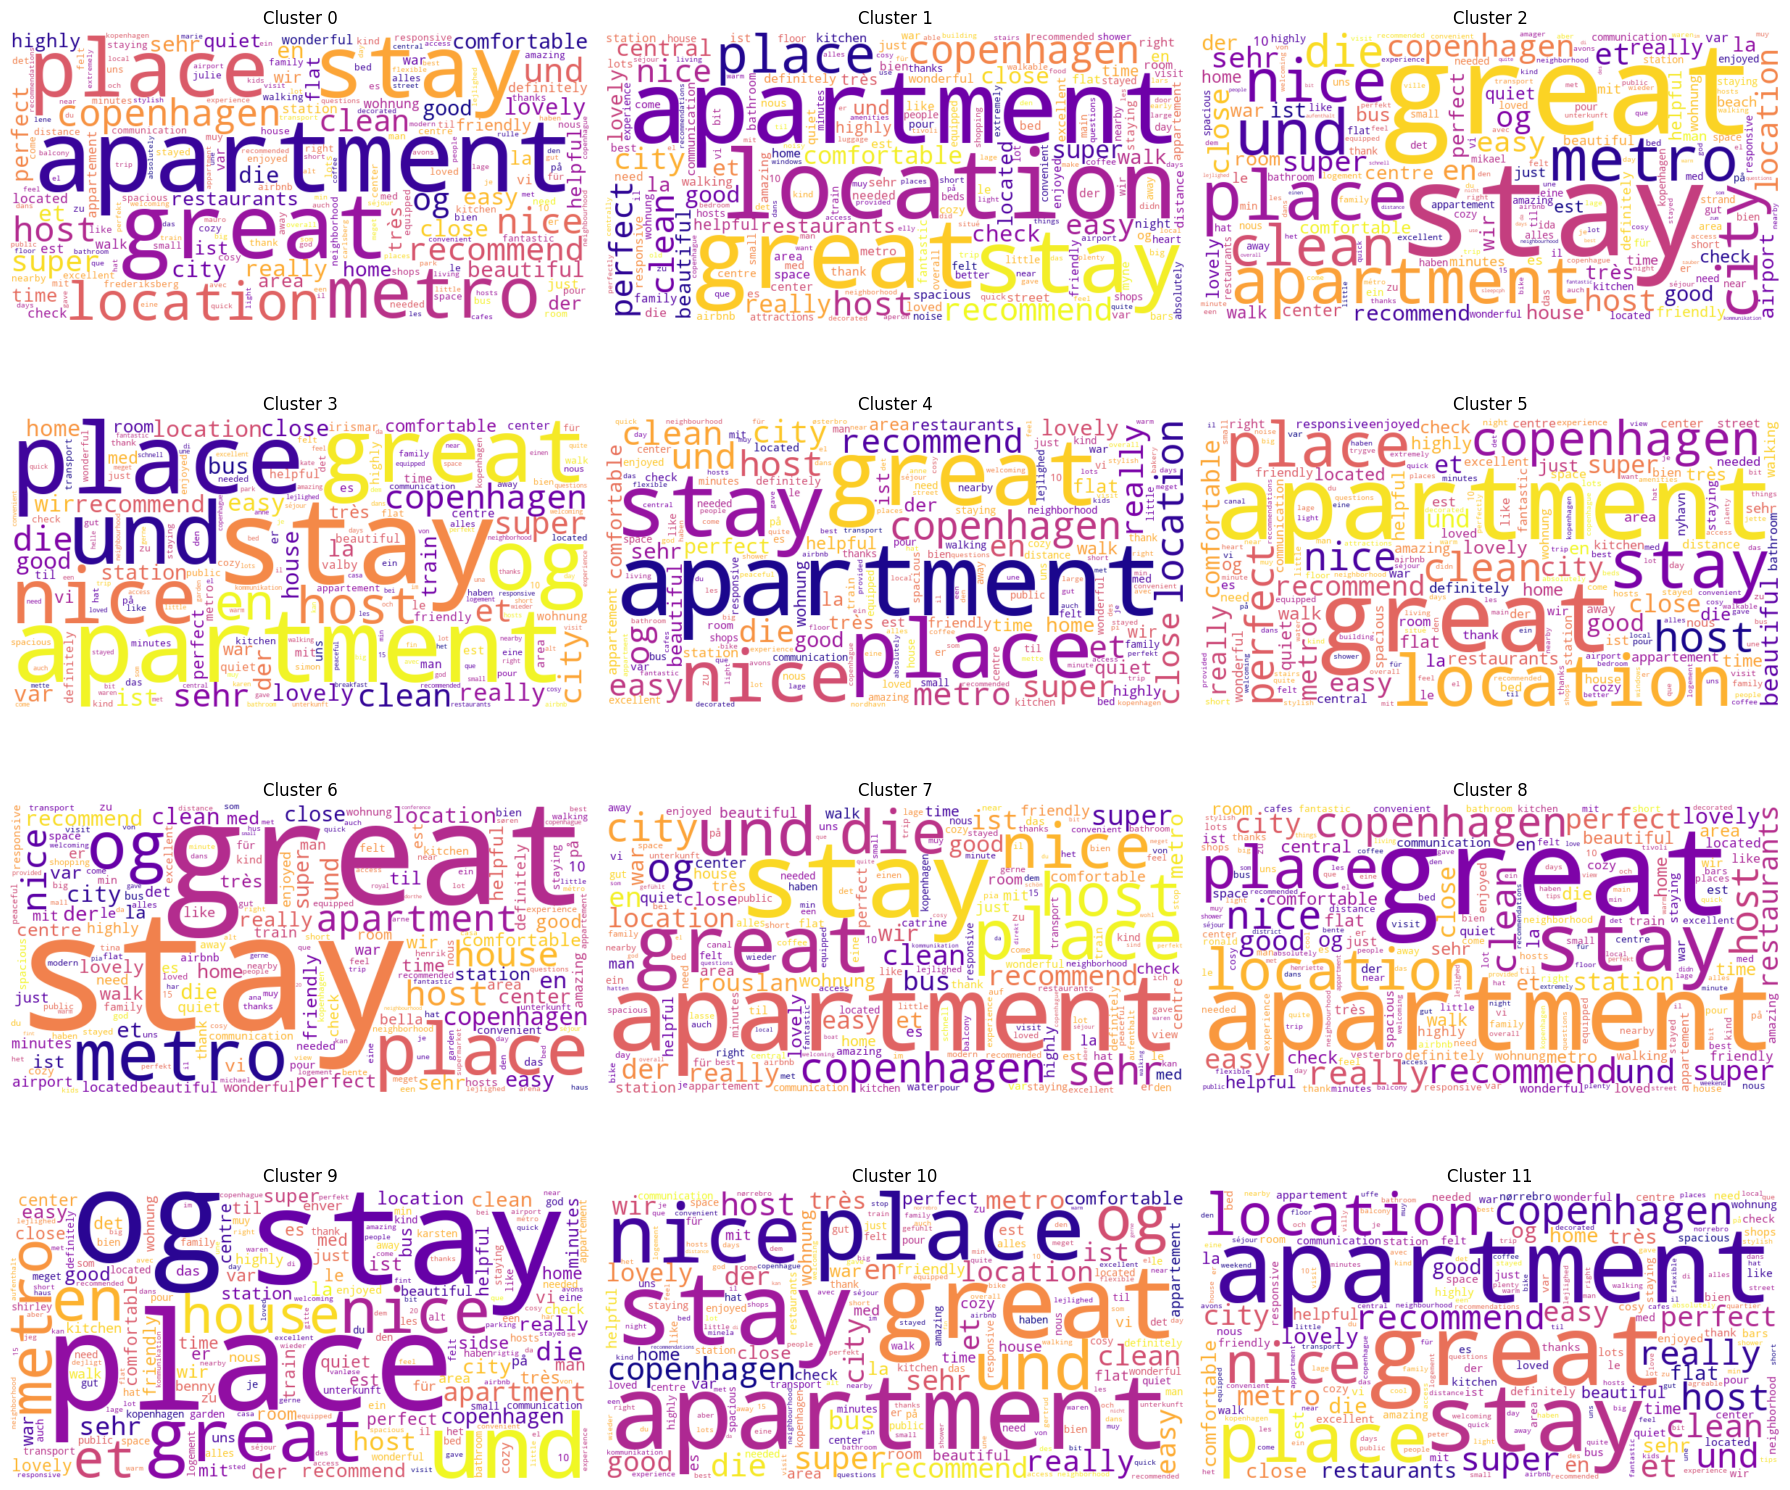

In [36]:
comm_names = tfidf_df_comm.index


n = len(comm_names)
cols = 3 
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for i, comm in enumerate(comm_names):
    scores = tfidf_df_comm.loc[comm]
    scaled_scores = scores / scores.max()  

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='plasma'
    ).generate_from_frequencies(scaled_scores.to_dict())

    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Cluster {comm}", fontsize=12)

plt.tight_layout()
plt.show()
